In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, f1_score
%matplotlib inline

RANDOM_SEED = 17
df=pd.read_csv ('bill_authentication.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
Распределение целевой переменной
0    0.555394
1    0.444606
Name: Class, dtype: float64


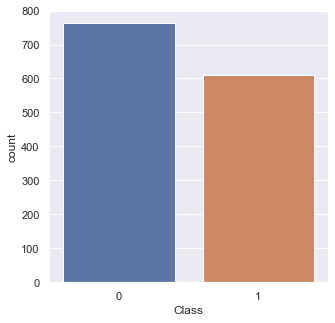

In [45]:
df.info()
print ('Распределение целевой переменной')
sns.set(rc={'figure.figsize':(5, 5)})
print(df['Class'].value_counts(normalize=True))
#гистограмма целевая переменная
fig,ax=plt.subplots()
sns.countplot(x=df['Class'], ax=ax)
plt.show()


In [46]:
#train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
#                                      n_features=2, random_state=RANDOM_SEED,
#                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
#def get_grid(data):
#    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
#    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
#    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

X=df.drop(columns=['Class'])
y=df['Class']
X_train, X_valid, y_train, y_valid=train_test_split(X,y, train_size=0.8, random_state=17)

clf_tree = DecisionTreeClassifier(max_depth=3, 
                                  random_state=RANDOM_SEED, max_features = 2)


Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная Class. Размер тестовой выборки возьмите за 0.2, random_state = 17 для разбиения и дерева. Максимальную глубину дерева примите за , максимальное число признаков, по которым ищется лучшее разбиение в дереве — за . Какое значение f1-score вы получили? Округлите до трёх знаков после точки-разделителя.

In [47]:
# training the tree
clf_tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, max_features=2, random_state=17)

In [48]:
y_pred = clf_tree.predict(X_valid)


print('f1_score: {}'.format(np.round(f1_score(y_valid, y_pred), 4)))

f1_score: 0.8664


In [62]:
xx=pd.DataFrame([2.04378,-0.38422,1.437292,0.76421]).T
y_pred = clf_tree.predict(xx)

In [61]:
xx

,0,1,2,3
0,2.04378,-0.38422,1.437292,0.76421


In [63]:
y_pred 

array([0])